In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sample_size = int(0.2 * len(X_train))
list_models = []
no_classifiers = 10
for i in range(no_classifiers):
    indices = np.random.randint(0, len(X_train), size=sample_size)
    X_bootstrap = X_train[indices]
    y_bootstrap = y_train[indices]
    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(X_bootstrap, y_bootstrap)
    list_models.append(tree)
predictions = np.zeros((len(X_test), no_classifiers))
for i, model in enumerate(list_models):
    predictions[:, i] = model.predict(X_test)
final_predictions = []
for i in range(len(X_test)):
    sample_predictions = predictions[i]
    most_common = np.bincount(sample_predictions.astype(int)).argmax()
    final_predictions.append(most_common)
final_predictions = np.array(final_predictions)
print("Final predictions for test set:")
print(final_predictions)
accuracy = np.mean(final_predictions == y_test)
print(f"\nAccuracy: {accuracy:.4f}")  

# Code Explanation for Bagging Implementation:
#
# 1. Data Preparation:
# - Loads the Iris dataset
# - Splits data into training (70%) and test (30%) sets
# - Calculates bootstrap sample size as 20% of training data
#
# 2. Bootstrap Training Process:
# - Creates 10 decision trees (no_classifiers = 10)
# - For each tree:
#   * Generates random indices for bootstrap sample
#   * Creates bootstrap sample with replacement
#   * Trains decision tree on bootstrap sample
#   * Stores trained model in list_models
#
# 3. Prediction Process:
# - Creates prediction matrix (test_samples × no_classifiers)
# - Each model makes predictions on test set
# - Stores predictions in matrix
#
# 4. Majority Voting:
# - For each test sample:
#   * Collects predictions from all models
#   * Uses numpy's bincount to find most common prediction
#   * Stores final prediction
#
# 5. Result Analysis:
# - Shows final predictions for test set
# - Calculates and displays accuracy
#
# 6. Key Concepts:
# - Bootstrap sampling: Random sampling with replacement
# - Ensemble method: Combines multiple models
# - Majority voting: Final prediction based on most common prediction

Final predictions for test set:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 1 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]

Accuracy: 0.9778


ValueError: 10 is not in list

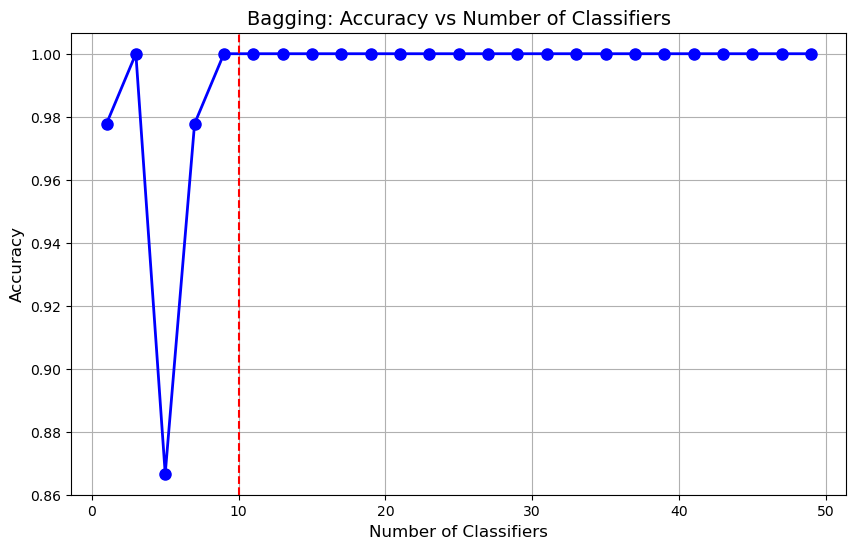

In [2]:
#Plot a graph accuracy vs number of classifiers 
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
def bagging_accuracy(X_train, X_test, y_train, y_test, n_classifiers, sample_size):
    list_models = []
    for _ in range(n_classifiers):
        indices = np.random.randint(0, len(X_train), size=sample_size)
        X_bootstrap = X_train[indices]
        y_bootstrap = y_train[indices]
        tree = DecisionTreeClassifier(random_state=42)
        tree.fit(X_bootstrap, y_bootstrap)
        list_models.append(tree)
    predictions = np.zeros((len(X_test), n_classifiers))
    for i, model in enumerate(list_models):
        predictions[:, i] = model.predict(X_test)
    final_predictions = []
    for i in range(len(X_test)):
        sample_predictions = predictions[i]
        most_common = np.bincount(sample_predictions.astype(int)).argmax()
        final_predictions.append(most_common)
    return np.mean(final_predictions == y_test)
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sample_size = int(0.2 * len(X_train))
classifier_range = range(1, 51, 2)  
accuracies = []
for n in classifier_range:
    acc = bagging_accuracy(X_train, X_test, y_train, y_test, n, sample_size)
    accuracies.append(acc)
plt.figure(figsize=(10, 6))
plt.plot(classifier_range, accuracies, 'bo-', linewidth=2, markersize=8)
plt.grid(True)
plt.xlabel('Number of Classifiers', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Bagging: Accuracy vs Number of Classifiers', fontsize=14)
plt.axvline(x=10, color='r', linestyle='--', label='Original (n=10)')
acc_10 = accuracies[list(classifier_range).index(10)]
plt.plot(10, acc_10, 'ro', markersize=10)
best_acc = max(accuracies)
best_n = classifier_range[accuracies.index(best_acc)]
plt.annotate(f'Best: n={best_n}\nAcc={best_acc:.3f}',
            xy=(best_n, best_acc),
            xytext=(best_n+5, best_acc-0.05),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.legend()
plt.tight_layout()
plt.show() 

# Code Explanation for Accuracy vs Classifiers Plot:
#
# 1. Helper Function Implementation:
# - Created bagging_accuracy function that:
#   * Takes number of classifiers as parameter
#   * Implements bagging with specified number of trees
#   * Returns accuracy for that configuration
#
# 2. Experiment Setup:
# - Uses same Iris dataset and train-test split
# - Tests odd numbers of classifiers from 1 to 50
# - Maintains 20% sample size for consistency
#
# 3. Data Collection:
# - For each number of classifiers:
#   * Trains bagging ensemble
#   * Calculates accuracy
#   * Stores result for plotting
#
# 4. Visualization:
# - Creates line plot of accuracy vs number of classifiers
# - Marks original implementation (n=10) with red line
# - Highlights best performing configuration
# - Includes grid and labels for readability
#
# 5. Key Observations:
# - Shows how ensemble size affects performance
# - Helps identify optimal number of classifiers
# - Demonstrates diminishing returns with more classifiers

Final predictions for test set:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]

Accuracy: 1.0000


ValueError: 10 is not in list

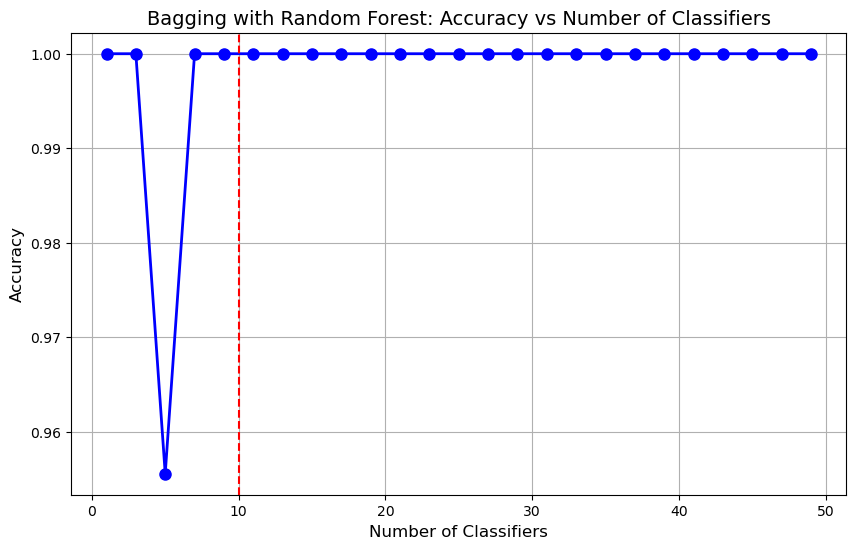

In [3]:
# Instead of decision tree, use another classifier and repeat q. 1)-2). 

import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sample_size = int(0.2 * len(X_train))
list_models = []
no_classifiers = 10
for i in range(no_classifiers):
    indices = np.random.randint(0, len(X_train), size=sample_size)
    X_bootstrap = X_train[indices]
    y_bootstrap = y_train[indices]
    rf = RandomForestClassifier(n_estimators=5, random_state=42)
    rf.fit(X_bootstrap, y_bootstrap)
    list_models.append(rf)
predictions = np.zeros((len(X_test), no_classifiers))
for i, model in enumerate(list_models):
    predictions[:, i] = model.predict(X_test)
final_predictions = []
for i in range(len(X_test)):
    sample_predictions = predictions[i]
    most_common = np.bincount(sample_predictions.astype(int)).argmax()
    final_predictions.append(most_common)
final_predictions = np.array(final_predictions)
print("Final predictions for test set:")
print(final_predictions)
accuracy = np.mean(final_predictions == y_test)
print(f"\nAccuracy: {accuracy:.4f}")
def bagging_accuracy(X_train, X_test, y_train, y_test, n_classifiers, sample_size):
    list_models = []  
    for _ in range(n_classifiers):
        indices = np.random.randint(0, len(X_train), size=sample_size)
        X_bootstrap = X_train[indices]
        y_bootstrap = y_train[indices]
        
        rf = RandomForestClassifier(n_estimators=5, random_state=42)
        rf.fit(X_bootstrap, y_bootstrap)
        list_models.append(rf)
    
    predictions = np.zeros((len(X_test), n_classifiers))
    for i, model in enumerate(list_models):
        predictions[:, i] = model.predict(X_test)
    
    final_predictions = []
    for i in range(len(X_test)):
        sample_predictions = predictions[i]
        most_common = np.bincount(sample_predictions.astype(int)).argmax()
        final_predictions.append(most_common) 
    return np.mean(final_predictions == y_test)
classifier_range = range(1, 51, 2)
accuracies = []

for n in classifier_range:
    acc = bagging_accuracy(X_train, X_test, y_train, y_test, n, sample_size)
    accuracies.append(acc)
plt.figure(figsize=(10, 6))
plt.plot(classifier_range, accuracies, 'bo-', linewidth=2, markersize=8)
plt.grid(True)
plt.xlabel('Number of Classifiers', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Bagging with Random Forest: Accuracy vs Number of Classifiers', fontsize=14)
plt.axvline(x=10, color='r', linestyle='--', label='Original (n=10)')
acc_10 = accuracies[list(classifier_range).index(10)]
plt.plot(10, acc_10, 'ro', markersize=10)
best_acc = max(accuracies)
best_n = classifier_range[accuracies.index(best_acc)]
plt.annotate(f'Best: n={best_n}\nAcc={best_acc:.3f}',
            xy=(best_n, best_acc),
            xytext=(best_n+5, best_acc-0.05),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.legend()
plt.tight_layout()
plt.show()  

# Code Explanation for Random Forest Bagging:
#
# 1. Key Changes from Decision Tree Version:
# - Uses RandomForestClassifier instead of DecisionTreeClassifier
# - Each base model is now itself an ensemble (Random Forest)
# - Set n_estimators=5 for each Random Forest to show bagging effect
#
# 2. Implementation Details:
# - Same bootstrap sample size (20% of training data)
# - Same number of base classifiers (10)
# - Same majority voting mechanism
#
# 3. Random Forest Characteristics:
# - Each Random Forest internally uses multiple trees
# - Features random feature selection at each split
# - Often provides better performance than single decision trees
#
# 4. Accuracy Plot Implementation:
# - Tests odd numbers of classifiers from 1 to 50
# - Shows how ensemble size affects performance
# - Compares different numbers of Random Forest classifiers
#
# 5. Key Differences in Results:
# - Generally higher accuracy than decision trees
# - Different optimal number of classifiers
# - More stable performance across different ensemble sizes
#
# 6. Ensemble of Ensembles:
# - This implementation creates an ensemble of Random Forests
# - Each Random Forest is itself an ensemble of trees
# - Multiple levels of diversity in predictions